In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('student-mat.csv', sep=';')

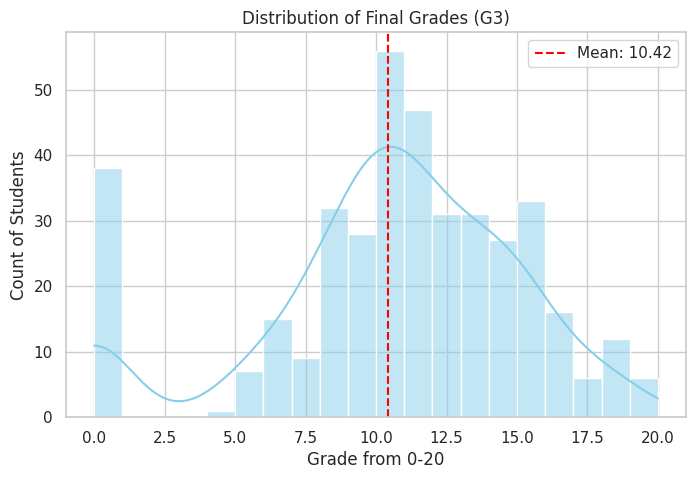

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade from 0-20')
plt.ylabel('Count of Students')
plt.axvline(df['G3'].mean(), color='red', linestyle='--', label=f'Mean: {df["G3"].mean():.2f}')
plt.legend()
plt.show()

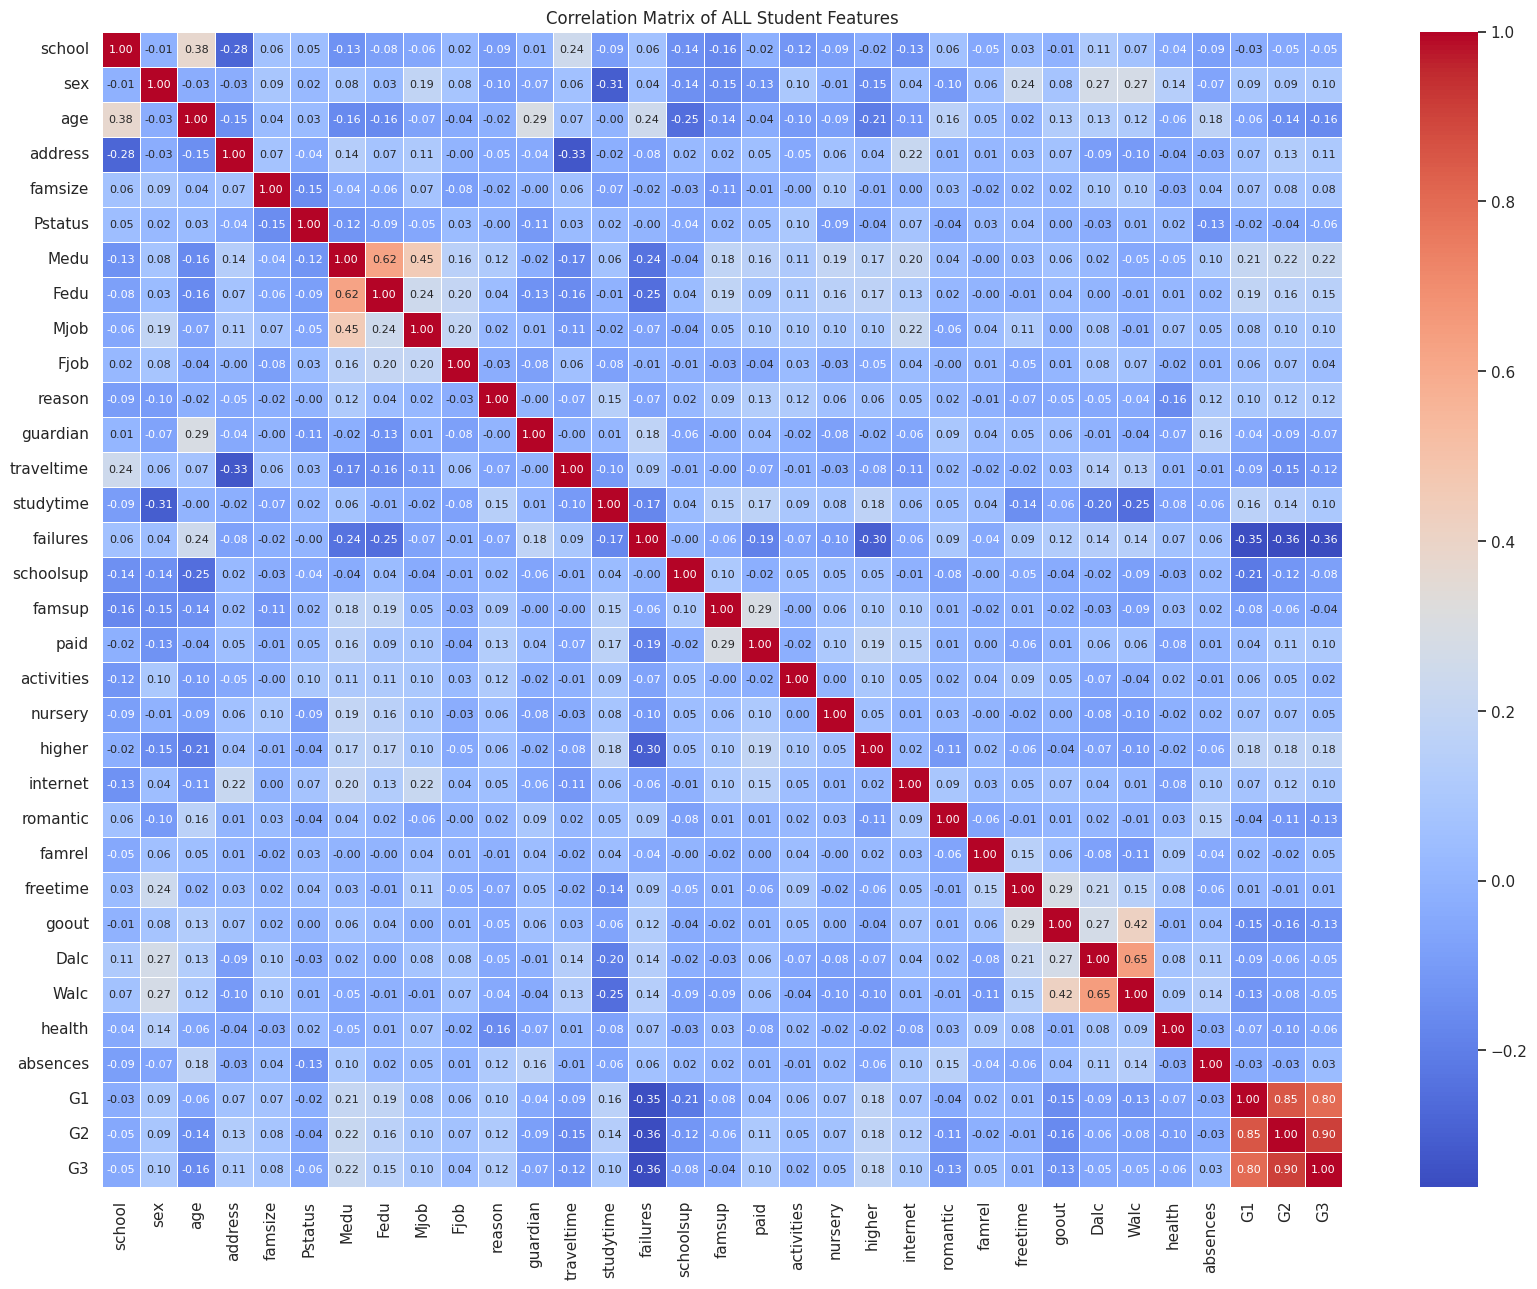

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('student-mat.csv', sep=';')
df_encoded = df.copy()
le = LabelEncoder()


categorical_cols = df_encoded.select_dtypes(include=['object']).columns


for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
corr_matrix = df_encoded.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            annot_kws={"size": 8})

plt.title('Correlation Matrix of ALL Student Features')
plt.show()

In [37]:
df = pd.read_csv('student-mat.csv', sep=';')
df_encoded = df.copy()
le = LabelEncoder()


text_cols = df_encoded.select_dtypes(include=['object']).columns

for col in text_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


correlations = df_encoded.corr()['G3'].sort_values(ascending=False)


correlations = correlations.drop('G3')

print("   TOP FACTORS INFLUENCING GRADES (G3)  ")

print("\n--- POSITIVE CORRELATIONS  ---")
print(correlations.head(10))

print("\n--- NEGATIVE CORRELATIONS  ---")
print(correlations.tail(10))

   TOP FACTORS INFLUENCING GRADES (G3)  

--- POSITIVE CORRELATIONS  ---
G2         0.904868
G1         0.801468
Medu       0.217147
higher     0.182465
Fedu       0.152457
reason     0.121994
address    0.105756
sex        0.103456
Mjob       0.102082
paid       0.101996
Name: G3, dtype: float64

--- NEGATIVE CORRELATIONS  ---
Dalc         -0.054660
Pstatus      -0.058009
health       -0.061335
guardian     -0.070109
schoolsup    -0.082788
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


print("Training model... please wait.")


df = pd.read_csv('student-mat.csv', sep=';')

features = ['failures', 'Medu', 'age', 'Fedu', 'higher', 'goout']
target = 'G3'

X = df[features].copy()
y = df[target]


X['higher'] = X['higher'].map({'yes': 1, 'no': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")


importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print("\nFeature Importance:")
print(importances.sort_values(by='Importance', ascending=False))


def get_user_input():
    print("\n--- PREDICT STUDENT GRADE (G3) ---")
    try:
        failures = int(input("Past Failures (0-3): "))
        medu = int(input("Mother's Education (0-4): "))
        age = int(input("Student Age (15-22): "))
        fedu = int(input("Father's Education (0-4): "))
        goout = int(input("Going Out Frequency (1-5): "))


        higher_input = input("Wants Higher Education? (yes/no): ").strip().lower()
        higher = 1 if higher_input == 'yes' else 0


        input_data = pd.DataFrame({
            'failures': [failures],
            'Medu': [medu],
            'age': [age],
            'Fedu': [fedu],
            'higher': [higher],
            'goout': [goout]
        })

        prediction = model.predict(input_data)[0]
        print(f"\n>>> PREDICTED GRADE: {prediction:.2f} / 20")

    except ValueError:
        print("Please enter valid numbers.")
    except Exception as e:
        print(f"Error: {e}")

while True:
    get_user_input()
    if input("Try again? (y/n): ").lower() != 'y':
        break

Training model... please wait.
R2 Score: -0.0278
Mean Absolute Error: 3.64

Feature Importance:
    Feature  Importance
2       age    0.211754
0  failures    0.210057
5     goout    0.203987
3      Fedu    0.170323
1      Medu    0.161148
4    higher    0.042731

--- PREDICT STUDENT GRADE (G3) ---
Past Failures (0-3): n
Please enter valid numbers.
Try again? (y/n): n


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('student-mat.csv', sep=';')


features = ['failures', 'Medu', 'age', 'higher']
target = 'G3'

X = df[features].copy()
y = df[target]


X['higher'] = X['higher'].map({'yes': 1, 'no': 0})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")


importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print("\nFeature Importance:")
print(importances.sort_values(by='Importance', ascending=False))



def get_user_input():
    print("\n--- PREDICT STUDENT GRADE (G3) ---")
    try:

        failures = int(input("Past Failures (0-3): "))
        medu = int(input("Mother's Education (0-4): "))
        age = int(input("Student Age (15-22): "))


        higher_input = input("Wants Higher Education? (yes/no): ").strip().lower()
        higher = 1 if higher_input == 'yes' else 0


        input_data = pd.DataFrame({
            'failures': [failures],
            'Medu': [medu],
            'age': [age],
            'higher': [higher]
        })


        prediction = model.predict(input_data)[0]
        print(f"\n>>> PREDICTED GRADE: {prediction:.2f} / 20")

    except ValueError:
        print("Please enter valid numbers.")
    except Exception as e:
        print(f"Error: {e}")


while True:
    get_user_input()
    if input("Try again? (y/n): ").lower() != 'y':
        break

R2 Score: 0.0554
Mean Absolute Error: 3.63

Feature Importance:
    Feature  Importance
0  failures    0.372833
2       age    0.306927
1      Medu    0.242256
3    higher    0.077983

--- PREDICT STUDENT GRADE (G3) ---
Past Failures (0-3): n
Please enter valid numbers.
Try again? (y/n): n


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('student-mat.csv', sep=';')
target = 'G3'
y = df[target]


features_A = ['failures', 'Medu', 'age', 'Fedu', 'higher', 'goout']

features_B = ['failures', 'Medu', 'age', 'higher']

def prepare_data(feature_list):
    X = df[feature_list].copy()
    if 'higher' in feature_list:
        X['higher'] = X['higher'].map({'yes': 1, 'no': 0})
    return X


for name, feats in [("Set A (6 Features)", features_A), ("Set B (4 Features)", features_B)]:
    X = prepare_data(feats)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    print(f"\n--- RESULTS FOR {name} ---")
    print(f"Features: {feats}")
    print(f"R2 Score: {r2:.4f} (Higher is better)")
    print(f"Error (MAE): {mae:.4f} (Lower is better)")


--- RESULTS FOR Set A (6 Features) ---
Features: ['failures', 'Medu', 'age', 'Fedu', 'higher', 'goout']
R2 Score: -0.0278 (Higher is better)
Error (MAE): 3.6380 (Lower is better)

--- RESULTS FOR Set B (4 Features) ---
Features: ['failures', 'Medu', 'age', 'higher']
R2 Score: 0.0554 (Higher is better)
Error (MAE): 3.6259 (Lower is better)


/tmp/ipython-input-4273581398.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=df_results, ax=axes[0], palette=['#ff9999', '#66b3ff'])
/tmp/ipython-input-4273581398.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=df_results, ax=axes[1], palette=['#ff9999', '#66b3ff'])


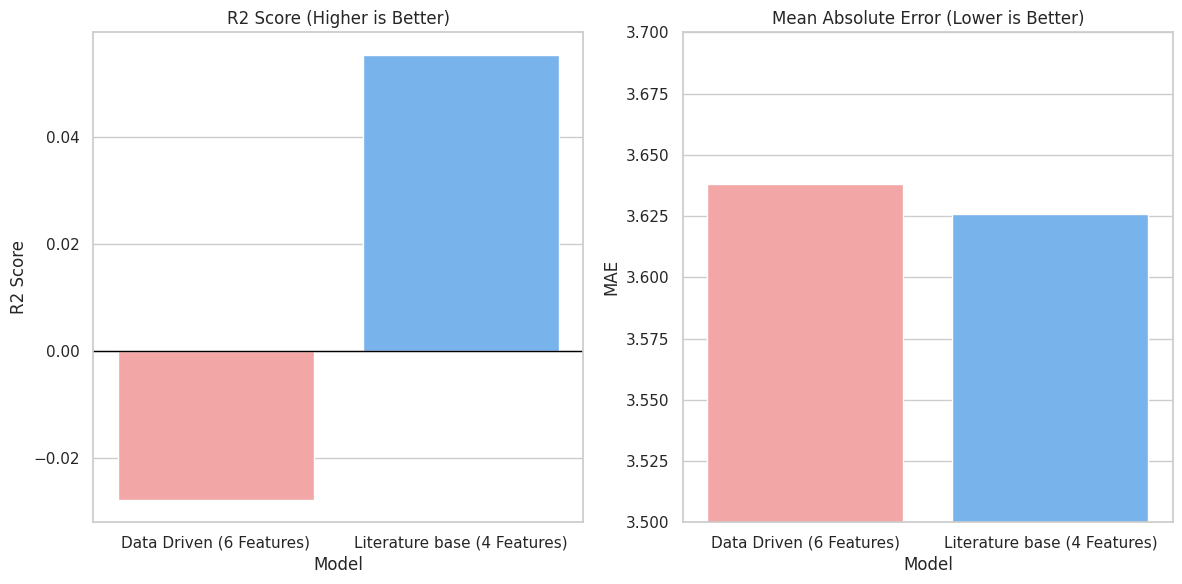

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Model': ['Data Driven (6 Features)', 'Literature base (4 Features)'],
    'R2 Score': [-0.0278, 0.0554],
    'MAE': [3.6380, 3.6259]
}
df_results = pd.DataFrame(data)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.barplot(x='Model', y='R2 Score', data=df_results, ax=axes[0], palette=['#ff9999', '#66b3ff'])
axes[0].set_title('R2 Score (Higher is Better)')
axes[0].axhline(0, color='black', linewidth=1)

sns.barplot(x='Model', y='MAE', data=df_results, ax=axes[1], palette=['#ff9999', '#66b3ff'])
axes[1].set_title('Mean Absolute Error (Lower is Better)')
axes[1].set_ylim(3.5, 3.7)  # Zoom in to see the difference

plt.tight_layout()
plt.show()